### Steps
- Importing package & libraries
- Training data preprocessing
- Model building
- Testing data preprocessing
- Predictions on testing data using built models
- Comparing model performance

### 1. Importing the required libraries & packages for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


/Users/Srikala/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2.  Training Data Preprocessing
- Reading data
- Dropping columns with more than 30000 null values
- Dropping columns that have same value throughout
- Modifying column with alias values to unique value
- Filling missing numerical values with mean
- Filling missing categorical values with mode
- Converting categorical values using one hot encoding method
- Standarizing numerical data
- Applying PCA on standarized data to reduce dimensions
- Balancing the imbalanced dataset using SMOTE

In [2]:
train_data=pd.read_csv("exercise_40_train.csv")  # reading the data

In [3]:
# Let's have a look at dataframe shape and data types
print(train_data.shape) # 40000 rows with 101 columns including label
print(train_data.info())
print(train_data.dtypes)

(40000, 101)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 101 entries, y to x100
dtypes: float64(86), int64(3), object(12)
memory usage: 30.8+ MB
None
y         int64
x1      float64
x2      float64
x3       object
x4      float64
x5      float64
x6      float64
x7       object
x8      float64
x9      float64
x10     float64
x11     float64
x12     float64
x13     float64
x14     float64
x15     float64
x16     float64
x17     float64
x18     float64
x19      object
x20     float64
x21     float64
x22     float64
x23     float64
x24      object
x25     float64
x26     float64
x27     float64
x28     float64
x29     float64
x30     float64
x31      object
x32     float64
x33      object
x34     float64
x35     float64
x36     float64
x37     float64
x38     float64
x39      object
x40     float64
x41     float64
x42     float64
x43     float64
x44     float64
x45     float64
x46     float64
x47     float64
x48     float64
x49     float64
x50     f

In [4]:
train_data.head() # checking data sample

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,$-908.650758424405,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,NaN,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,5-10 miles,18.129499,NaN,0.904626,1.227266,0.703326,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,NaN,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,$-1864.9622875143,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,NaN,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,5-10 miles,11.389081,99074.100620,-1.157897,-0.822055,-0.851141,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,NaN,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,$-543.187402955527,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,NaN,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,5-10 miles,14.372443,100087.339539,0.869508,0.150728,NaN,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,NaN,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,$-182.626380634258,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,NaN,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,5-10 miles,13.191173,100934.096543,NaN,-0.965711,NaN,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,NaN,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,-0.275406,90.76

In [5]:
train_data['x39'].value_counts() ## Checking x39 value and it seems to be constant throughout

5-10 miles    40000
Name: x39, dtype: int64

In [6]:
del train_data['x39'] # dropped column x39 as the value is same throughout.

In [7]:
train_data.shape

(40000, 100)

In [8]:
train_data.isnull().sum() # checking null value count of all the columns

y           0
x1          0
x2          0
x3          0
x4          0
x5       2428
x6          0
x7          0
x8          0
x9          0
x10         0
x11      5110
x12         0
x13         0
x14      9864
x15         0
x16     11212
x17         0
x18         0
x19         0
x20         0
x21         0
x22      2387
x23         0
x24      3856
x25         0
x26      2433
x27         0
x28         0
x29         0
x30     32336
x31         0
x32         0
x33      7171
x34         0
x35         0
x36         0
x37         0
x38      2402
x40         0
x41      9503
x42      9729
x43         0
x44     34247
x45      8009
x46         0
x47         0
x48         0
x49     12823
x50         0
x51         0
x52     16182
x53         0
x54     12728
x55     17696
x56         0
x57     32464
x58         0
x59         0
x60         0
x61      7293
x62         0
x63      2420
x64      5101
x65         0
x66         0
x67      2425
x68      2384
x69         0
x70         0
x71         0
x72   

In [9]:
train_data.shape

(40000, 100)

In [10]:
# let's drop the columns that have more than 30000 null values. Model will not learn any infoormation from that column.
train_data=train_data.dropna(thresh=10000,how='all',axis=1) # dropped columns with more than 30000 null values [ x30,x44 & x57 are droppped]

In [11]:
train_data.shape # after dropping 3 columns that had more than 30k missing values

(40000, 97)

In [12]:
train_data.isnull().sum()

y           0
x1          0
x2          0
x3          0
x4          0
x5       2428
x6          0
x7          0
x8          0
x9          0
x10         0
x11      5110
x12         0
x13         0
x14      9864
x15         0
x16     11212
x17         0
x18         0
x19         0
x20         0
x21         0
x22      2387
x23         0
x24      3856
x25         0
x26      2433
x27         0
x28         0
x29         0
x31         0
x32         0
x33      7171
x34         0
x35         0
x36         0
x37         0
x38      2402
x40         0
x41      9503
x42      9729
x43         0
x45      8009
x46         0
x47         0
x48         0
x49     12823
x50         0
x51         0
x52     16182
x53         0
x54     12728
x55     17696
x56         0
x58         0
x59         0
x60         0
x61      7293
x62         0
x63      2420
x64      5101
x65         0
x66         0
x67      2425
x68      2384
x69         0
x70         0
x71         0
x72         0
x73         0
x74     12916
x75   

In [13]:
print(train_data.shape)
print(train_data.info())


(40000, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x3      40000 non-null  object 
 4   x4      40000 non-null  float64
 5   x5      37572 non-null  float64
 6   x6      40000 non-null  float64
 7   x7      40000 non-null  object 
 8   x8      40000 non-null  float64
 9   x9      40000 non-null  float64
 10  x10     40000 non-null  float64
 11  x11     34890 non-null  float64
 12  x12     40000 non-null  float64
 13  x13     40000 non-null  float64
 14  x14     30136 non-null  float64
 15  x15     40000 non-null  float64
 16  x16     28788 non-null  float64
 17  x17     40000 non-null  float64
 18  x18     40000 non-null  float64
 19  x19     40000 non-null  object 
 20  x20     40000 non-null  float64
 21  x21     40000 non-null 

In [14]:
## there are some columns with % & $ symbols,let's remove them 
train_data[['x7','x19']] = train_data[['x7','x19']].replace('[$,%]','',regex=True).astype(float) # replaced $, % symbols

In [15]:
print(train_data.shape)
print(train_data.info()) # x7 & x19 were object type before, after dropping the symbols, they can be considered as float type

(40000, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x3      40000 non-null  object 
 4   x4      40000 non-null  float64
 5   x5      37572 non-null  float64
 6   x6      40000 non-null  float64
 7   x7      40000 non-null  float64
 8   x8      40000 non-null  float64
 9   x9      40000 non-null  float64
 10  x10     40000 non-null  float64
 11  x11     34890 non-null  float64
 12  x12     40000 non-null  float64
 13  x13     40000 non-null  float64
 14  x14     30136 non-null  float64
 15  x15     40000 non-null  float64
 16  x16     28788 non-null  float64
 17  x17     40000 non-null  float64
 18  x18     40000 non-null  float64
 19  x19     40000 non-null  float64
 20  x20     40000 non-null  float64
 21  x21     40000 non-null 

In [16]:
train_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x31,x32,x33,x34,x35,x36,x37,x38,x40,x41,x42,x43,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062,0.220784,1.816481,1.171788,109.626841,4.644568,4.814885,1.541740,-0.587361,101.906052,4.278444,77.709700,-908.650758,7.328029,36.601967,126.384294,1.264713,female,3.834082,2.352406,905.491445,14.779467,0.752524,no,-0.597288,Colorado,46.667221,3.159002,69.444841,32.450076,NaN,18.129499,NaN,0.904626,1.227266,-0.810371,0.234654,53.359113,58.251700,16.084987,1602.756464,2.740134,7.617666,72.167186,0.166127,NaN,-1.532562,300.629990,0,August,9.840873,6.600008,1.252479,46.992716,farmers,1.212048,12.896733,15.263491,0.518653,0.543768,-0.912506,53.521544,7.723719,NaN,NaN,NaN,mercedes,51.287604,1.0,11.131462,-0.471594,-3.261865,0.085710,0.383351,126.935322,47.872599,-0.162668,1.079562,10.602395,2.770844,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064,1.192441,3.513950,1.419900,84.079367,1.459868,1.443983,NaN,-1.165869,100.112121,8.487132,70.808566,-1864.962288,6.796408,3.789176,93.037021,0.346201,male,4.345028,1.651579,868.784447,25.914680,1.445294,no,1.127376,Tennessee,47.928569,-1.013712,61.289132,35.521824,31.526217,11.389081,99074.100620,-1.157897,-0.822055,2.651773,1.104631,37.728834,56.052749,NaN,3350.837875,1.995635,NaN,73.964560,NaN,NaN,0.956001,300.629990,0,April,6.939395,3.864254,0.057936,48.216622,allstate,0.738526,14.402071,33.940951,-0.140384,1.016703,-0.000234,46.797571,7.260365,-1.731529,0.666354,-2.870800,mercedes,42.918352,NaN,11.715043,1.691428,-4.789183,4.684722,2.138771,102.409522,46.584780,1.252022,1.223852,10.408146,3.703013,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-0.0008,0.952323,0.782974,-1.247022,95.375221,1.098525,1.216059,0.450624,0.211685,99.215210,8.601193,75.922820,-543.187403,3.802395,7.407996,71.022413,0.070968,male,4.332644,-0.375737,1077.233497,13.177479,4.174536,no,2.605279,Texas,56.674425,0.108486,69.798923,30.684074,31.049447,14.372443,100087.339539,0.869508,0.150728,-0.856591,-2.561083,50.236892,63.975108,6.998154,3756.910196,1.772648,15.057485,59.428690,1.844493,NaN,4.127857,182.369349,0,September,6.228138,1.370661,-0.239705,54.120933,geico,-0.032980,14.402071,18.211817,-0.819798,1.010811,-0.000234,48.202036,9.336021,0.209817,1.124866,-3.558718,subaru,55.020333,1.0,5.660882,-2.608974,-6.387984,2.506272,2.138771,NaN,53.977291,0.657292,-0.353469,NaN,3.997183,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057,-0.520756,1.825586,2.223038,96.420382,-1.390239,3.962961,NaN,-2.046856,NaN,6.611554,74.966925,-182.626381,7.728963,8.136213,121.610846,0.700954,male,7.294990,-0.603983,1051.655489,17.006528,2.347355,no,1.071202,Minnesota,59.154933,1.319711,65.408246,34.401290,48.363690,13.191173,100934.096543,NaN,-0.965711,0.422522,-2.123048,41.857197,59.226119,NaN,1961.609788,3.155214,NaN,68.671023,-1.020225,5.833712,0.663759,300.629990,0,September,6.005140,0.013162,0.318335,54.784192,geico,-0.466535,14.402071,14.629914,1.389325,0.704880,-1.510949,49.882647,5.661421,1.606797,1.726010,-0.398417,nissan,47.769343,1.0,7.472328,1.424316,-5.431998,3.285291,2.138771,105.208424,49.543472,2.066346,1.761266,NaN,2.933707,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109,-0.732739,2.151990,-0.275406,90.769952,7.230125,3.877312,0.392002,-1.201565,100.626558,9.103015,77.977156,967.007091,2.272765,24.452102,56.492317,-1.102387,male,6.313827,0.429187,949.

In [17]:
#Seperate categorical variables
category_data = train_data.loc[:,train_data.dtypes == np.object]


In [18]:
#### Two features are int, converting them to float.
train_data['x59'] = train_data['x59'].astype('float64')
train_data['x98'] = train_data['x98'].astype('float64')

In [19]:

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 97 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       40000 non-null  int64  
 1   x1      40000 non-null  float64
 2   x2      40000 non-null  float64
 3   x3      40000 non-null  object 
 4   x4      40000 non-null  float64
 5   x5      37572 non-null  float64
 6   x6      40000 non-null  float64
 7   x7      40000 non-null  float64
 8   x8      40000 non-null  float64
 9   x9      40000 non-null  float64
 10  x10     40000 non-null  float64
 11  x11     34890 non-null  float64
 12  x12     40000 non-null  float64
 13  x13     40000 non-null  float64
 14  x14     30136 non-null  float64
 15  x15     40000 non-null  float64
 16  x16     28788 non-null  float64
 17  x17     40000 non-null  float64
 18  x18     40000 non-null  float64
 19  x19     40000 non-null  float64
 20  x20     40000 non-null  float64
 21  x21     40000 non-null  float64
 22

In [20]:
print(category_data.shape)

(40000, 9)


In [21]:
category_data.head()

,x3,x24,x31,x33,x60,x65,x77,x93,x99
0,Wed,female,no,Colorado,August,farmers,mercedes,no,yes
1,Friday,male,no,Tennessee,April,allstate,mercedes,no,yes
2,Thursday,male,no,Texas,September,geico,subaru,no,yes
3,Tuesday,male,no,Minnesota,September,geico,nissan,no,yes
4,Sunday,male,yes,New York,January,geico,toyota,yes,yes


In [22]:
#Seperate categorical variables
float_data = train_data.loc[:,train_data.dtypes == np.float64]

In [23]:
print(float_data.shape)


(40000, 87)


### Filling missing values in numerical data

In [24]:
float_data.isnull().sum()

x1          0
x2          0
x4          0
x5       2428
x6          0
x7          0
x8          0
x9          0
x10         0
x11      5110
x12         0
x13         0
x14      9864
x15         0
x16     11212
x17         0
x18         0
x19         0
x20         0
x21         0
x22      2387
x23         0
x25         0
x26      2433
x27         0
x28         0
x29         0
x32         0
x34         0
x35         0
x36         0
x37         0
x38      2402
x40         0
x41      9503
x42      9729
x43         0
x45      8009
x46         0
x47         0
x48         0
x49     12823
x50         0
x51         0
x52     16182
x53         0
x54     12728
x55     17696
x56         0
x58         0
x59         0
x61      7293
x62         0
x63      2420
x64      5101
x66         0
x67      2425
x68      2384
x69         0
x70         0
x71         0
x72         0
x73         0
x74     12916
x75      5245
x76      5249
x78     11373
x79      2430
x80      5256
x81         0
x82         0
x83   

In [25]:
# Filling the missing values with Mean for each numerical feature
for i in float_data:
    float_data[i].fillna(value = float_data[i].mean(), inplace = True)

In [26]:
print(float_data.shape)

(40000, 87)


In [27]:
float_data.isnull().sum() # no more null values

x1      0
x2      0
x4      0
x5      0
x6      0
x7      0
x8      0
x9      0
x10     0
x11     0
x12     0
x13     0
x14     0
x15     0
x16     0
x17     0
x18     0
x19     0
x20     0
x21     0
x22     0
x23     0
x25     0
x26     0
x27     0
x28     0
x29     0
x32     0
x34     0
x35     0
x36     0
x37     0
x38     0
x40     0
x41     0
x42     0
x43     0
x45     0
x46     0
x47     0
x48     0
x49     0
x50     0
x51     0
x52     0
x53     0
x54     0
x55     0
x56     0
x58     0
x59     0
x61     0
x62     0
x63     0
x64     0
x66     0
x67     0
x68     0
x69     0
x70     0
x71     0
x72     0
x73     0
x74     0
x75     0
x76     0
x78     0
x79     0
x80     0
x81     0
x82     0
x83     0
x84     0
x85     0
x86     0
x87     0
x88     0
x89     0
x90     0
x91     0
x92     0
x94     0
x95     0
x96     0
x97     0
x98     0
x100    0
dtype: int64

### Cleaning categorical data & filling missing values

In [28]:
# Feature x3 needs to be cleaned, as some has alias values. Making it follow the same pattern throughout
category_data['x3']=category_data['x3'].replace({'Sun': 'Sunday', 'Mon': 'Monday','Tue': 'Tuesday','Wed': 'Wednesday','Thur': 'Thursday','Fri': 'Friday','Sat': 'Saturday'})

In [29]:
category_data.head()

,x3,x24,x31,x33,x60,x65,x77,x93,x99
0,Wednesday,female,no,Colorado,August,farmers,mercedes,no,yes
1,Friday,male,no,Tennessee,April,allstate,mercedes,no,yes
2,Thursday,male,no,Texas,September,geico,subaru,no,yes
3,Tuesday,male,no,Minnesota,September,geico,nissan,no,yes
4,Sunday,male,yes,New York,January,geico,toyota,yes,yes


In [30]:
category_data['x3'].value_counts() # checking if anymore aliases are present.

Wednesday    6973
Tuesday      6863
Monday       6344
Friday       5595
Saturday     5383
Thursday     4434
Sunday       4408
Name: x3, dtype: int64

In [31]:
category_data.isnull().sum() # checking null values

x3         0
x24     3856
x31        0
x33     7171
x60        0
x65        0
x77     9257
x93        0
x99    12836
dtype: int64

In [32]:
# Filling the missing values with Mode for each categorical feature
for i in category_data:
    category_data[i].fillna(value = category_data[i].mode()[0], inplace = True)
    

In [33]:
category_data.isnull().sum() # checking null values after filling the missing values

x3     0
x24    0
x31    0
x33    0
x60    0
x65    0
x77    0
x93    0
x99    0
dtype: int64

In [34]:

category_data['x31'].value_counts() #checking distribution of x31 feature

no     34022
yes     5978
Name: x31, dtype: int64

In [35]:
category_data['x93'].value_counts()#checking distribution of x93 feature

no     35506
yes     4494
Name: x93, dtype: int64

In [36]:
category_data['x99'].value_counts() #checking distribution of x99 feature

yes    40000
Name: x99, dtype: int64

In [37]:
del category_data['x99'] # deleting this column as entire column has same value which is yes.

In [38]:
category_data.head()

,x3,x24,x31,x33,x60,x65,x77,x93
0,Wednesday,female,no,Colorado,August,farmers,mercedes,no
1,Friday,male,no,Tennessee,April,allstate,mercedes,no
2,Thursday,male,no,Texas,September,geico,subaru,no
3,Tuesday,male,no,Minnesota,September,geico,nissan,no
4,Sunday,male,yes,New York,January,geico,toyota,yes


In [39]:
### Converting categorical data to numerical using one hot encoding.

x3_dummies = pd.get_dummies(category_data.x3, prefix = 'x3').iloc[:,1:]
x24_dummies = pd.get_dummies(category_data.x24, prefix = 'x24').iloc[:,1:]
x31_dummies = pd.get_dummies(category_data.x31, prefix = 'x31').iloc[:,1:]
x33_dummies = pd.get_dummies(category_data.x33, prefix = 'x33').iloc[:,1:]
x60_dummies = pd.get_dummies(category_data.x60, prefix = 'x60').iloc[:,1:]
x65_dummies = pd.get_dummies(category_data.x65, prefix = 'x65').iloc[:,1:]
x77_dummies = pd.get_dummies(category_data.x77, prefix = 'x77').iloc[:,1:]
x93_dummies = pd.get_dummies(category_data.x93, prefix = 'x93').iloc[:,1:]

In [40]:

category_data = pd.concat([x3_dummies, x24_dummies, x31_dummies, x33_dummies,x60_dummies,x65_dummies,x77_dummies,x93_dummies], axis = 1)
category_data.head()


,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1


In [41]:
### Standarizing the numerical data
scalar = StandardScaler()
#min_max_scalar = MinMaxScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(float_data))
scaled_data.shape


(40000, 87)

In [42]:
### Applying Principal component analysis to reduce the dimensions. 
### Given variance as 0.95, ie it should retain 95% of the information
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(scaled_data)
print(pca.n_components_) # prints the number of components required to maintian 95% of the infm
pca_df=pca.transform(scaled_data)
pc_df = pd.DataFrame(data = pca_df) 


61


In [43]:
pc_df.shape # no of columns reduced from 87 to 61 after applying PCA

(40000, 61)

In [44]:
#create new dataframe with labels, pc_df & encoded values
processed_data = pd.concat([train_data['y'],pc_df,category_data], axis = 1)

In [45]:
processed_data.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes
0,0,0.157951,0.827569,-2.255790,-3.101585,-1.224484,0.741200,-2.704699,0.962903,0.779322,-1.198465,-0.761941,-0.938955,1.144162,0.450718,0.174363,-0.316753,-0.278239,-3.371286,1.057463,0.453225,-1.484204,-0.064234,-0.446696,0.734215,1.666599,0.731003,0.537381,0.336002,-0.196618,-1.046122,0.629851,1.746970,1.318803,-1.483151,-0.813851,0.224443,-1.241618,-1.520558,0.367914,-1.648192,0.128490,-0.502050,-0.337891,0.129871,-0.738091,1.825574,0.376704,0.886918,1.803001,0.592059,0.246654,-0.393136,0.376941,-0.002268,-0.035877,-0.702638,0.101143,-0.575832,-0.468483,-0.187460,0.050819,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,1,3.821563,-0.364546,1.880130,-2.692590,0.980421,2.632356,0.610582,-0.465700,-2.516833,-2.261673,-0.155840,0.084667,-0.075521,-0.018310,2.238416,-0.339759,1.903972,0.575780,-0.169408,-1.074187,0.695655,0.104909,0.246587,0.868431,-0.646795,-0.041757,-1.687143,-0.560116,0.505288,1.596904,0.692267,0.882315,0.105591,0.320658,1.988393,-0.322915,-0.343650,-1.619343,0.130200,-1.504813,-0.614759,-0.442652,1.695871,-0.420801,1.881085,-1.154757,-0.572227,-0.307433,0.764929,-1.692020,-0.562082,0.400920,-0.048584,-0.596175,-0.066960,-0.464161,0.584879,0.394796,-0.322304,0.122061,0.207775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0.719681,-0.225050,4.380950,0.243758,-1.234401,-2.260345,1.060880,-1.445707,0.519216,0.275602,-0.999892,-3.235714,-0.014405,-0.304763,-0.449548,1.551925,1.442081,0.295550,-0.061282,0.810356,-1.419516,1.002582,-1.624688,0.048771,0.481145,-0.985705,0.129444,-0.542166,-0.501522,-0.866675,-0.329065,1.022455,0.203259,-0.720727,0.312227,1.118703,1.362493,0.128829,-1.129509,0.901300,-0.571446,2.465029,-0.846209,0.320226,1.185634,-0.643803,1.903899,-0.540428,-0.239204,-0.794775,-0.982116,-1.143687,-0.902748,1.067071,2.126383,0.313999,-0.527310,-0.836435,-0.963553,-0.265217,0.290297,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,0,2.779213,-0.894683,0.731502,-0.709468,-0.644331,0.128521,-0.041361,-1.859513,1.447745,-0.261681,0.251386,0.191906,0.278679,-1.375989,0.033696,0.493066,-0.220887,-0.496009,-1.761628,0.411264,0.998887,3.044604,-0.229201,1.193217,1.112584,1.145492,-0.664021,-0.175926,0.310294,-0.273498,1.420226,0.893200,-1.119819,0.121250,0.428490,-1.057817,0.816761,-2.314659,0.853861,-1.979628,0.716536,-1.277149,0.106188,-1.160400,-0.170862,1.225241,1.523900,-0.310976,-0.818665,-0.023341,0.604085,0.273567,0.118562,-0.321678,0.233063,-0.492426,0.488340,0.854877,-0.029145,-0.417716,1.062053,0,0,0,

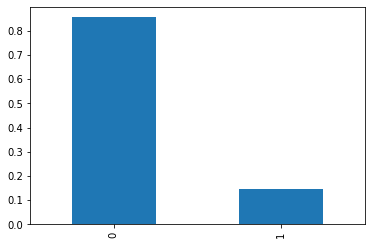

In [46]:
### Now checking y variable(label distribution)
# Looks like the data is imbalanced with more data with 0 labels.

processed_data['y'].value_counts(normalize = True).plot(kind = 'bar')

In [47]:
# Separating out the target
y = processed_data['y'].values
del processed_data['y']

In [48]:
y


array([0, 1, 1, ..., 0, 0, 0])

In [49]:
processed_data.head() # after dropping y

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes
0,0.157951,0.827569,-2.255790,-3.101585,-1.224484,0.741200,-2.704699,0.962903,0.779322,-1.198465,-0.761941,-0.938955,1.144162,0.450718,0.174363,-0.316753,-0.278239,-3.371286,1.057463,0.453225,-1.484204,-0.064234,-0.446696,0.734215,1.666599,0.731003,0.537381,0.336002,-0.196618,-1.046122,0.629851,1.746970,1.318803,-1.483151,-0.813851,0.224443,-1.241618,-1.520558,0.367914,-1.648192,0.128490,-0.502050,-0.337891,0.129871,-0.738091,1.825574,0.376704,0.886918,1.803001,0.592059,0.246654,-0.393136,0.376941,-0.002268,-0.035877,-0.702638,0.101143,-0.575832,-0.468483,-0.187460,0.050819,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,3.821563,-0.364546,1.880130,-2.692590,0.980421,2.632356,0.610582,-0.465700,-2.516833,-2.261673,-0.155840,0.084667,-0.075521,-0.018310,2.238416,-0.339759,1.903972,0.575780,-0.169408,-1.074187,0.695655,0.104909,0.246587,0.868431,-0.646795,-0.041757,-1.687143,-0.560116,0.505288,1.596904,0.692267,0.882315,0.105591,0.320658,1.988393,-0.322915,-0.343650,-1.619343,0.130200,-1.504813,-0.614759,-0.442652,1.695871,-0.420801,1.881085,-1.154757,-0.572227,-0.307433,0.764929,-1.692020,-0.562082,0.400920,-0.048584,-0.596175,-0.066960,-0.464161,0.584879,0.394796,-0.322304,0.122061,0.207775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.719681,-0.225050,4.380950,0.243758,-1.234401,-2.260345,1.060880,-1.445707,0.519216,0.275602,-0.999892,-3.235714,-0.014405,-0.304763,-0.449548,1.551925,1.442081,0.295550,-0.061282,0.810356,-1.419516,1.002582,-1.624688,0.048771,0.481145,-0.985705,0.129444,-0.542166,-0.501522,-0.866675,-0.329065,1.022455,0.203259,-0.720727,0.312227,1.118703,1.362493,0.128829,-1.129509,0.901300,-0.571446,2.465029,-0.846209,0.320226,1.185634,-0.643803,1.903899,-0.540428,-0.239204,-0.794775,-0.982116,-1.143687,-0.902748,1.067071,2.126383,0.313999,-0.527310,-0.836435,-0.963553,-0.265217,0.290297,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,2.779213,-0.894683,0.731502,-0.709468,-0.644331,0.128521,-0.041361,-1.859513,1.447745,-0.261681,0.251386,0.191906,0.278679,-1.375989,0.033696,0.493066,-0.220887,-0.496009,-1.761628,0.411264,0.998887,3.044604,-0.229201,1.193217,1.112584,1.145492,-0.664021,-0.175926,0.310294,-0.273498,1.420226,0.893200,-1.119819,0.121250,0.428490,-1.057817,0.816761,-2.314659,0.853861,-1.979628,0.716536,-1.277149,0.106188,-1.160400,-0.170862,1.225241,1.523900,-0.310976,-0.818665,-0.023341,0.604085,0.273567,0.118562,-0.321678,0.233063,-0.492426,0.488340,0.854877,-0.029145,-0.417716,1.062053,0,0,0,0,1,0,1,0,

In [50]:
x=processed_data.copy()
x.head() # x has data alone with no labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,x3_Monday,x3_Saturday,x3_Sunday,x3_Thursday,x3_Tuesday,x3_Wednesday,x24_male,x31_yes,x33_Alaska,x33_Arizona,x33_Arkansas,x33_California,x33_Colorado,x33_Connecticut,x33_DC,x33_Delaware,x33_Florida,x33_Georgia,x33_Hawaii,x33_Idaho,x33_Illinois,x33_Indiana,x33_Iowa,x33_Kansas,x33_Kentucky,x33_Louisiana,x33_Maine,x33_Maryland,x33_Massachusetts,x33_Michigan,x33_Minnesota,x33_Mississippi,x33_Missouri,x33_Montana,x33_Nebraska,x33_Nevada,x33_New Hampshire,x33_New Jersey,x33_New Mexico,x33_New York,x33_North Carolina,x33_North Dakota,x33_Ohio,x33_Oklahoma,x33_Oregon,x33_Pennsylvania,x33_Rhode Island,x33_South Carolina,x33_South Dakota,x33_Tennessee,x33_Texas,x33_Utah,x33_Vermont,x33_Virginia,x33_Washington,x33_West Virginia,x33_Wisconsin,x33_Wyoming,x60_August,x60_December,x60_February,x60_January,x60_July,x60_June,x60_March,x60_May,x60_November,x60_October,x60_September,x65_esurance,x65_farmers,x65_geico,x65_progressive,x77_chevrolet,x77_ford,x77_mercedes,x77_nissan,x77_subaru,x77_toyota,x93_yes
0,0.157951,0.827569,-2.255790,-3.101585,-1.224484,0.741200,-2.704699,0.962903,0.779322,-1.198465,-0.761941,-0.938955,1.144162,0.450718,0.174363,-0.316753,-0.278239,-3.371286,1.057463,0.453225,-1.484204,-0.064234,-0.446696,0.734215,1.666599,0.731003,0.537381,0.336002,-0.196618,-1.046122,0.629851,1.746970,1.318803,-1.483151,-0.813851,0.224443,-1.241618,-1.520558,0.367914,-1.648192,0.128490,-0.502050,-0.337891,0.129871,-0.738091,1.825574,0.376704,0.886918,1.803001,0.592059,0.246654,-0.393136,0.376941,-0.002268,-0.035877,-0.702638,0.101143,-0.575832,-0.468483,-0.187460,0.050819,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,3.821563,-0.364546,1.880130,-2.692590,0.980421,2.632356,0.610582,-0.465700,-2.516833,-2.261673,-0.155840,0.084667,-0.075521,-0.018310,2.238416,-0.339759,1.903972,0.575780,-0.169408,-1.074187,0.695655,0.104909,0.246587,0.868431,-0.646795,-0.041757,-1.687143,-0.560116,0.505288,1.596904,0.692267,0.882315,0.105591,0.320658,1.988393,-0.322915,-0.343650,-1.619343,0.130200,-1.504813,-0.614759,-0.442652,1.695871,-0.420801,1.881085,-1.154757,-0.572227,-0.307433,0.764929,-1.692020,-0.562082,0.400920,-0.048584,-0.596175,-0.066960,-0.464161,0.584879,0.394796,-0.322304,0.122061,0.207775,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.719681,-0.225050,4.380950,0.243758,-1.234401,-2.260345,1.060880,-1.445707,0.519216,0.275602,-0.999892,-3.235714,-0.014405,-0.304763,-0.449548,1.551925,1.442081,0.295550,-0.061282,0.810356,-1.419516,1.002582,-1.624688,0.048771,0.481145,-0.985705,0.129444,-0.542166,-0.501522,-0.866675,-0.329065,1.022455,0.203259,-0.720727,0.312227,1.118703,1.362493,0.128829,-1.129509,0.901300,-0.571446,2.465029,-0.846209,0.320226,1.185634,-0.643803,1.903899,-0.540428,-0.239204,-0.794775,-0.982116,-1.143687,-0.902748,1.067071,2.126383,0.313999,-0.527310,-0.836435,-0.963553,-0.265217,0.290297,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,2.779213,-0.894683,0.731502,-0.709468,-0.644331,0.128521,-0.041361,-1.859513,1.447745,-0.261681,0.251386,0.191906,0.278679,-1.375989,0.033696,0.493066,-0.220887,-0.496009,-1.761628,0.411264,0.998887,3.044604,-0.229201,1.193217,1.112584,1.145492,-0.664021,-0.175926,0.310294,-0.273498,1.420226,0.893200,-1.119819,0.121250,0.428490,-1.057817,0.816761,-2.314659,0.853861,-1.979628,0.716536,-1.277149,0.106188,-1.160400,-0.170862,1.225241,1.523900,-0.310976,-0.818665,-0.023341,0.604085,0.273567,0.118562,-0.321678,0.233063,-0.492426,0.488340,0.854877,-0.029145,-0.417716,1.062053,0,0,0,0,1,0,1,0,

In [51]:
# Let's check the count distribution of y
print('Original dataset shape', Counter(y))

Original dataset shape Counter({0: 34197, 1: 5803})


In [52]:
### Data set looks imbalanced,lets balance it now.Using SMOTE method for balancing.


smote = SMOTE()
x=np.array(x)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 34197, 1: 5803})
Resample dataset shape Counter({0: 34197, 1: 34197})


In [53]:
x.shape  # dataset before applying SMOTE

(40000, 141)

In [54]:
x_smote.shape # new dataset after applying SMOTE,dataset is balanced now.

(68394, 141)

In [55]:
X=x_smote # final training data
Y=y_smote # final training labels

### 3. Model Building

In [56]:
# importing the reuired metric libraries

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score

### 3.a) Logistic Regression 

In [57]:
 # importing required libraries for logistic regression
from sklearn.linear_model import LogisticRegression



In [58]:
#split x and y data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                  Y,
                                  test_size=0.2,
                                  random_state=1)

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test) 

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_pred, y_test))



Accuracy:  0.7238833248044447
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      6491
           1       0.75      0.71      0.73      7188

    accuracy                           0.72     13679
   macro avg       0.72      0.72      0.72     13679
weighted avg       0.73      0.72      0.72     13679



In [59]:
#Generate predicted probabilites
y_probs = logistic_regression.predict_proba(x_test)
y_probs # prints the probability for both class 0 & class 1


array([[0.64065276, 0.35934724],
       [0.34624995, 0.65375005],
       [0.31144813, 0.68855187],
       ...,
       [0.24427603, 0.75572397],
       [0.69284294, 0.30715706],
       [0.69661941, 0.30338059]])

In [60]:
y_probs[:,1] # printing the probability for class 1 alone



array([0.35934724, 0.65375005, 0.68855187, ..., 0.75572397, 0.30715706,
       0.30338059])

      0     1
0  4814  2100
1  1677  5088
Test Data Accuracy: 0.7239


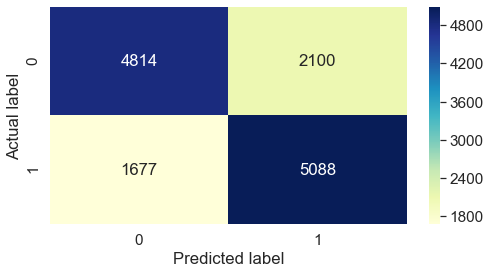

In [61]:
## Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred,) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
#plt.plot(df_cm)
print(df_cm)
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
#ax.set_ylim([0,2])
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### 3.b) Using neural networks

In [62]:


# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units =256 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 141))
model.add(Dropout(0.3))

# Adding the second hidden layer
model.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.3))

# Adding the output layer ,activation is sigmoid as it's a binary classification
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Using TensorFlow backend.


In [63]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])# Fitting the ANN to the Training set

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               36352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 69,377
Trainable params: 69,377
Non-trainable params: 0
_________________________________________________________________


In [65]:
# split x and y data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                  Y,
                                  test_size=0.2,
                                  random_state=1)

In [66]:
###### Check the model with 25 epochs
history = model.fit(x_train, y_train, batch_size = 32, epochs = 25, validation_data=(x_test, y_test))

Train on 54715 samples, validate on 13679 samples
Epoch 1/25
54715/54715 [==============================] - 13s 234us/step - loss: 0.4686 - accuracy: 0.7797 - val_loss: 0.3856 - val_accuracy: 0.8336
Epoch 2/25
54715/54715 [==============================] - 12s 215us/step - loss: 0.3661 - accuracy: 0.8403 - val_loss: 0.3442 - val_accuracy: 0.8517
Epoch 3/25
54715/54715 [==============================] - 14s 249us/step - loss: 0.3194 - accuracy: 0.8646 - val_loss: 0.3141 - val_accuracy: 0.8655
Epoch 4/25
54715/54715 [==============================] - 13s 232us/step - loss: 0.2848 - accuracy: 0.8792 - val_loss: 0.2987 - val_accuracy: 0.8735
Epoch 5/25
54715/54715 [==============================] - 12s 224us/step - loss: 0.2609 - accuracy: 0.8910 - val_loss: 0.2821 - val_accuracy: 0.8814
Epoch 6/25
54715/54715 [==============================] - 12s 227us/step - loss: 0.2405 - accuracy: 0.9012 - val_loss: 0.2720 - val_accuracy: 0.8864
Epoch 7/25
54715/54715 [==============================] 

In [67]:
score = model.evaluate(x_test, y_test)
y_pred=model.predict_proba(x_test)
y_pred = (y_pred.round(2)) # probability for class 1
y_pred


13679/13679 [==============================] - 1s 38us/step


array([[0.  ],
       [0.94],
       [1.  ],
       ...,
       [0.87],
       [0.01],
       [0.  ]], dtype=float32)

In [82]:
y_pred = (y_pred > 0.5) # converting y_pred to true or false format for classification metrics
#print(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6914
           1       0.92      0.92      0.92      6765

    accuracy                           0.92     13679
   macro avg       0.92      0.92      0.92     13679
weighted avg       0.92      0.92      0.92     13679



In [69]:
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.9205


      0     1
0  6400   514
1   573  6192
Test Data Accuracy: 0.9205


Text(0.5, 8.5, 'Predicted label')

<Figure size 720x360 with 0 Axes>

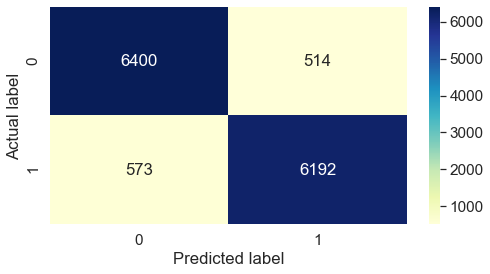

In [70]:
## Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

print(df_cm)
plt.figure(figsize = (10,5))
sns.set(font_scale=1.4)

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
#ax.set_ylim([0,2])
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4. Testing data preprocessing

In [71]:
### Now preprocessing test data
 
test_data=pd.read_csv("exercise_40_test.csv")
 # Let's have a look at dataframe shape and data types
print(test_data.shape)
#print(test_data.info())
#print(test_data.dtypes)
#print(test_data.head())

del test_data['x39'] # deleted as value is same throughout

 # dropped columns with more than 30000 null values [ x30,x44 & x57 are droppped]
del test_data['x30']
del test_data['x44']
del test_data['x57']

# removed '$'  &  '%' symbols 
test_data[['x7','x19']] = test_data[['x7','x19']].replace('[$,%]','',regex=True).astype(float) # replaced $, % symbols

#Seperate categorical variables
category_data = test_data.loc[:,train_data.dtypes == np.object]

#### Two features are int, converting them to float.
test_data['x59'] = test_data['x59'].astype('float64')
test_data['x98'] = test_data['x98'].astype('float64')

#Seperate categorical variables
float_data = test_data.loc[:,test_data.dtypes == np.float64]

# Filling the missing values with Mean for each numerical feature
for i in float_data:
    float_data[i].fillna(value = float_data[i].mean(), inplace = True)
print(float_data.shape) # 40000,87

# Feature x3 needs to be cleaned, as some has alias values. Making it follow the same pattern
category_data['x3']=category_data['x3'].replace({'Sun': 'Sunday', 'Mon': 'Monday','Tue': 'Tuesday','Wed': 'Wednesday','Thur': 'Thursday','Fri': 'Friday','Sat': 'Saturday'})

# Filling the missing values with Mode for each categorical feature
for i in category_data:
        category_data[i].fillna(value = category_data[i].mode()[0], inplace = True)

## deleting x99 column as entire column has same value which is yes.
del category_data['x99']

# Categorical features are encoded using one hot encoding
x3_dummies = pd.get_dummies(category_data.x3, prefix = 'x3').iloc[:,1:]
x24_dummies = pd.get_dummies(category_data.x24, prefix = 'x24').iloc[:,1:]
x31_dummies = pd.get_dummies(category_data.x31, prefix = 'x31').iloc[:,1:]
x33_dummies = pd.get_dummies(category_data.x33, prefix = 'x33').iloc[:,1:]
x60_dummies = pd.get_dummies(category_data.x60, prefix = 'x60').iloc[:,1:]
x65_dummies = pd.get_dummies(category_data.x65, prefix = 'x65').iloc[:,1:]
x77_dummies = pd.get_dummies(category_data.x77, prefix = 'x77').iloc[:,1:]
x93_dummies = pd.get_dummies(category_data.x93, prefix = 'x93').iloc[:,1:]
category_data = pd.concat([x3_dummies, x24_dummies, x31_dummies, x33_dummies,x60_dummies,x65_dummies,x77_dummies,x93_dummies], axis = 1)

# Features are standarized
scalar = StandardScaler()
#min_max_scalar = MinMaxScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(float_data))


# PCA applied to reduce dimensionality
pca = PCA(.95)
pca.fit(scaled_data)
print(pca.n_components_)
pca_df=pca.transform(scaled_data)
pc_df = pd.DataFrame(data = pca_df)

#created new dataset from pc_df & encoded data
processed_test_data = pd.concat([pc_df,category_data], axis = 1)

#print(processed_test_data.head())
#print(processed_test_data.isnull().sum())


(10000, 100)
(10000, 87)
61


In [72]:
processed_test_data.shape # testing  data set with 10000 rows & 141 columns

(10000, 141)

In [73]:
X=processed_test_data # Final testing set X ready


### 4. Predicting labels for test data using built models

#### 4.1) Using logistic regression

In [74]:

Y_LR= logistic_regression.predict_proba(X)
Y_LR

array([[0.07438716, 0.92561284],
       [0.31443578, 0.68556422],
       [0.12483419, 0.87516581],
       ...,
       [0.38543912, 0.61456088],
       [0.67959546, 0.32040454],
       [0.65131876, 0.34868124]])

In [75]:
Y_LR[:,1] # selecting probability for class 1


array([0.92561284, 0.68556422, 0.87516581, ..., 0.61456088, 0.32040454,
       0.34868124])

In [76]:
np.savetxt('glmresults.csv', Y_LR[:,1], delimiter=',', fmt='%0.4f')  # writing the values to csv

#### 4.2) Using Neural networks

In [77]:
Y_NN=model.predict(X)
Y_NN.round(2) # probability for class 1

array([[0.01],
       [0.04],
       [0.88],
       ...,
       [0.01],
       [0.  ],
       [0.  ]], dtype=float32)

In [78]:
np.savetxt('nonglmresults.csv', Y_NN, delimiter=',', fmt='%0.4f') # writing the values to csv

### 5. Comparing models with AUC

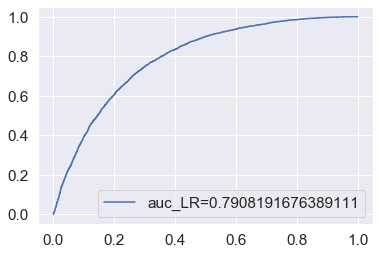

In [79]:
## Using logistic regression, gets AUC of 0.78

y_pred_LR = logistic_regression.predict_proba(x_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_pred_LR)
auc_LR = metrics.roc_auc_score(y_test, y_pred_LR)
plt.plot(fpr_LR,tpr_LR,label="auc_LR="+str(auc_LR))
plt.legend(loc=4)
plt.show()

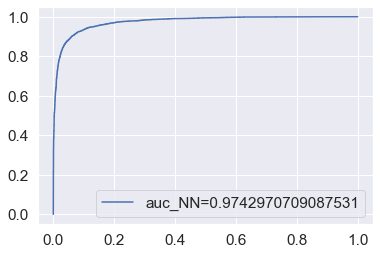

In [80]:
## Using neural network, gets AUC of 0.97
y_pred_NN = model.predict_proba(x_test)
fpr_NN, tpr_NN, _ = metrics.roc_curve(y_test,  y_pred_NN)
auc_NN = metrics.roc_auc_score(y_test, y_pred_NN)
plt.plot(fpr_NN,tpr_NN,label="auc_NN="+str(auc_NN))
plt.legend(loc=4)
plt.show()

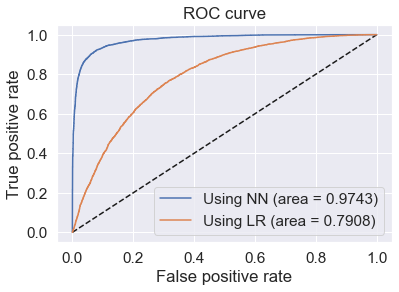

In [81]:
# Combining both, since NN has greater AUC, NN performs better.

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_NN, tpr_NN, label='Using NN (area = {:.4f})'.format(auc_NN))
plt.plot(fpr_LR, tpr_LR, label='Using LR (area = {:.4f})'.format(auc_LR))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()